In [56]:
#Bibliografía: https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
#Importaciones necesarias

import re, string, unicodedata

# NLTK
# kit de herramientas de lenguaje natural
import nltk #https://www.nltk.org/

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# CONTRACTIONS
import contractions #https://github.com/kootenpv/contractions

# INFLECT
#para realizar las tareas relacionadas con el lenguaje natural de generar plurales, 
#sustantivos singulares, ordinales y artículos indefinidos, y 
#(lo que más nos interesa) convertir números en palabras
import inflect #https://pypi.org/project/inflect/

# BEAUTIFULSOUP
#biblioteca para extraer datos de documentos HTML y XML
from bs4 import BeautifulSoup #https://www.crummy.com/software/BeautifulSoup/bs4/doc/

#Para abrir urls
import urllib.request

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


[nltk_data] Downloading package punkt to /home/magdalena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/magdalena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/magdalena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
#guardamos html o xml en variable sample

#Leemos url
fp = urllib.request.urlopen("https://larevancha.pythonanywhere.com/")
#Leemos url
mybytes = fp.read()
#Guardamos en sample lo que hay
sample = mybytes.decode("utf8")
#Cerramos la url
fp.close()

In [47]:
#Función para limpiar html
def strip_html(text):
    #Eliminar html
    soup = BeautifulSoup(text, "html.parser")
    #Eliminar javascript y css
    [x.extract() for x in soup.findAll(['script', 'style'])]
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

sample = denoise_text(sample)

In [48]:
#Reemplazar contracciones (ej don't por do not)
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

sample = replace_contractions(sample)
print(sample)






Home | La Revancha















      La Revancha
    

        Colectivo de mujeres que informa y promueve la práctica del fútbol femenino
desde una perspectiva de género. Rosario, Argentina.
    


Continue










LÍDERAS


            TORNEOS
          


Fúbol 5

Liga San Patricio



Fútbol 7

Sorrento Fútbol 7



Fútbol 11

Liga Rosarina



Fúbol de Salón

Aerofusa



Fútbol Playa

Playa




Fútbol Militante
Clubes
Escuelas


          Mundialista
        

Selección Argentina de Fútbol 11


Galeria
Nosotras


Facebook











Buscar









03 Febrero, 2019
Noticia de prueba
								





								Un texto es una composición de signos codificados ...
							

Ver Más




04 Febrero, 2019
Probando 123
								





								123 probando...
							

Ver Más




03 Marzo, 2019
Otra noticia de prueba
								





								Un texto es una composición de signos codificados ...
							

Ver Más








1












Nombre



Email



Asunto



Mensaje










Dirección
Sa

In [49]:
#Tokenización
#divide cadenas de texto más largas en piezas más pequeñas o tokens 
words = nltk.word_tokenize(sample)
print(words)

['Home', '|', 'La', 'Revancha', 'La', 'Revancha', 'Colectivo', 'de', 'mujeres', 'que', 'informa', 'y', 'promueve', 'la', 'práctica', 'del', 'fútbol', 'femenino', 'desde', 'una', 'perspectiva', 'de', 'género', '.', 'Rosario', ',', 'Argentina', '.', 'Continue', 'LÍDERAS', 'TORNEOS', 'Fúbol', '5', 'Liga', 'San', 'Patricio', 'Fútbol', '7', 'Sorrento', 'Fútbol', '7', 'Fútbol', '11', 'Liga', 'Rosarina', 'Fúbol', 'de', 'Salón', 'Aerofusa', 'Fútbol', 'Playa', 'Playa', 'Fútbol', 'Militante', 'Clubes', 'Escuelas', 'Mundialista', 'Selección', 'Argentina', 'de', 'Fútbol', '11', 'Galeria', 'Nosotras', 'Facebook', 'Buscar', '03', 'Febrero', ',', '2019', 'Noticia', 'de', 'prueba', 'Un', 'texto', 'es', 'una', 'composición', 'de', 'signos', 'codificados', '...', 'Ver', 'Más', '04', 'Febrero', ',', '2019', 'Probando', '123', '123', 'probando', '...', 'Ver', 'Más', '03', 'Marzo', ',', '2019', 'Otra', 'noticia', 'de', 'prueba', 'Un', 'texto', 'es', 'una', 'composición', 'de', 'signos', 'codificados', '...

In [50]:
#Normalización
#poner todo el texto en igualdad de condiciones: convirtiendo todo el texto en el 
#mismo caso (superior o inferior), eliminando la puntuación, convirtiendo los números 
#a sus equivalentes de palabras, y así sucesivamente

def remove_non_ascii(words):
    """Eliminar caracteres no ASCII de la lista de palabras en token"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convierte todos los caracteres a minúsculas de la lista de palabras tokenizadas"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Eliminar puntuación de la lista de palabras tokenizadas"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Reemplace todas las apariciones de enteros en la lista de palabras tokenizadas con representación textual"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Eliminar palabras de parada de la lista de palabras en token"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

words = normalize(words)
print(words)

['home', 'la', 'revancha', 'la', 'revancha', 'colectivo', 'de', 'mujeres', 'que', 'informa', 'promueve', 'la', 'practica', 'del', 'futbol', 'femenino', 'desde', 'una', 'perspectiva', 'de', 'genero', 'rosario', 'argentina', 'continue', 'lideras', 'torneos', 'fubol', 'five', 'liga', 'san', 'patricio', 'futbol', 'seven', 'sorrento', 'futbol', 'seven', 'futbol', 'eleven', 'liga', 'rosarina', 'fubol', 'de', 'salon', 'aerofusa', 'futbol', 'playa', 'playa', 'futbol', 'militante', 'clubes', 'escuelas', 'mundialista', 'seleccion', 'argentina', 'de', 'futbol', 'eleven', 'galeria', 'nosotras', 'facebook', 'buscar', 'three', 'febrero', 'two thousand and nineteen', 'noticia', 'de', 'prueba', 'un', 'texto', 'es', 'una', 'composicion', 'de', 'signos', 'codificados', 'ver', 'mas', 'four', 'febrero', 'two thousand and nineteen', 'probando', 'one hundred and twenty-three', 'one hundred and twenty-three', 'probando', 'ver', 'mas', 'three', 'marzo', 'two thousand and nineteen', 'otra', 'noticia', 'de', 'p

In [51]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

stems, lemmas = stem_and_lemmatize(words)
print('Tokens de origen:\n', stems)
print('\nLematización:\n', lemmas)
#Esto da como resultado un retorno de 2 nuevas listas: una de tokens de origen y 
#otra de tokens de lematización con respecto a los verbos

Tokens de origen:
 ['hom', 'la', 'revanch', 'la', 'revanch', 'colectivo', 'de', 'muj', 'que', 'inform', 'promuev', 'la', 'practic', 'del', 'futbol', 'femenino', 'desd', 'un', 'perspectiv', 'de', 'genero', 'rosario', 'argentin', 'continu', 'lidera', 'torneo', 'fubol', 'fiv', 'lig', 'san', 'patricio', 'futbol', 'sev', 'sorrento', 'futbol', 'sev', 'futbol', 'elev', 'lig', 'rosarin', 'fubol', 'de', 'salon', 'aerofus', 'futbol', 'play', 'play', 'futbol', 'milit', 'club', 'escuela', 'mundialist', 'selecc', 'argentin', 'de', 'futbol', 'elev', 'galer', 'nosotra', 'facebook', 'busc', 'three', 'febrero', 'two thousand and nineteen', 'notic', 'de', 'prueb', 'un', 'texto', 'es', 'un', 'compos', 'de', 'signo', 'codificado', 'ver', 'mas', 'four', 'febrero', 'two thousand and nineteen', 'probando', 'one hundred and twenty-thr', 'one hundred and twenty-thr', 'probando', 'ver', 'mas', 'three', 'marzo', 'two thousand and nineteen', 'otr', 'notic', 'de', 'prueb', 'un', 'texto', 'es', 'un', 'compos', 'de'

In [52]:
#Frecuencia de distribución
fdist = FreqDist(lemmas)
print(fdist)

<FreqDist with 74 samples and 119 outcomes>


In [53]:
fdist.most_common(2)

[('de', 8), ('futbol', 7)]

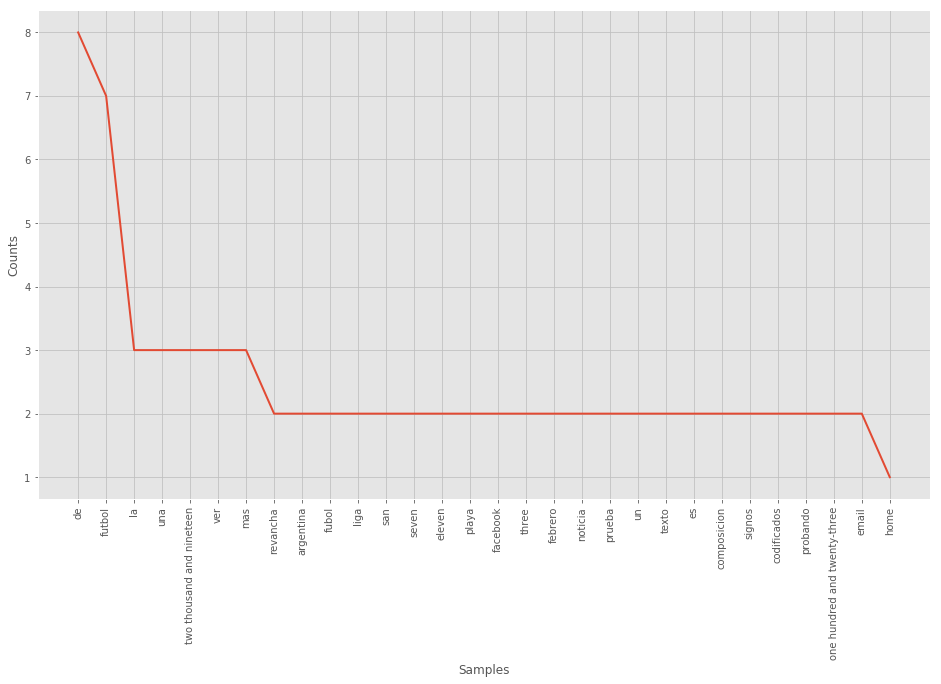

In [54]:
# Ploteo frecuencia de distribución
fdist.plot(30,cumulative=False)
plt.show()

In [57]:
#Las palabras clave se consideran como ruido en el texto. Las eliminamos
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'vuestros', 'otra', 'fueron', 'tuviera', 'quienes', 'esta', 'eso', 'habido', 'tuviese', 'habida', 'otras', 'hubieses', 'lo', 'me', 'mío', 'sobre', 'habíais', 'esa', 'fuimos', 'tuviesen', 'con', 'nuestro', 'tuyo', 'poco', 'estuve', 'hubiésemos', 'he', 'sus', 'estés', 'también', 'mucho', 'estad', 'seas', 'fuiste', 'teníamos', 'tendríais', 'estén', 'les', 'seréis', 'éramos', 'hayáis', 'tenemos', 'tuya', 'tened', 'habrá', 'estuvisteis', 'habrán', 'habrían', 'tenga', 'fuerais', 'tenéis', 'ante', 'otros', 'cual', 'habremos', 'seré', 'estuvieran', 'eran', 'tuvisteis', 'hubiéramos', 'hasta', 'hayas', 'tuve', 'todo', 'estuviesen', 'sois', 'estarían', 'estas', 'os', 'algunas', 'esas', 'tenidos', 'algunos', 'mi', 'son', 'estaremos', 'estuvieras', 'has', 'pero', 'estado', 'hubieseis', 'está', 'ellos', 'estabais', 'que', 'nuestras', 'fuese', 'habías', 'míos', 'siente', 'habidas', 'tengas', 'tuvieras', 'antes', 'nuestra', 'estaríamos', 'hayan', 'tuvieran', 'estuviese', 'seríamos', 'estando', 'todos

In [59]:
filtered_sent=[]
for w in lemmas:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",lemmas)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['home', 'la', 'revancha', 'la', 'revancha', 'colectivo', 'de', 'mujeres', 'que', 'informa', 'promueve', 'la', 'practica', 'del', 'futbol', 'femenino', 'desde', 'una', 'perspectiva', 'de', 'genero', 'rosario', 'argentina', 'continue', 'lideras', 'torneos', 'fubol', 'five', 'liga', 'san', 'patricio', 'futbol', 'seven', 'sorrento', 'futbol', 'seven', 'futbol', 'eleven', 'liga', 'rosarina', 'fubol', 'de', 'salon', 'aerofusa', 'futbol', 'playa', 'playa', 'futbol', 'militante', 'club', 'escuelas', 'mundialista', 'seleccion', 'argentina', 'de', 'futbol', 'eleven', 'galeria', 'nosotras', 'facebook', 'buscar', 'three', 'febrero', 'two thousand and nineteen', 'noticia', 'de', 'prueba', 'un', 'texto', 'es', 'una', 'composicion', 'de', 'signos', 'codificados', 'ver', 'mas', 'four', 'febrero', 'two thousand and nineteen', 'probando', 'one hundred and twenty-three', 'one hundred and twenty-three', 'probando', 'ver', 'mas', 'three', 'marzo', 'two thousand and nineteen', 'otra', '

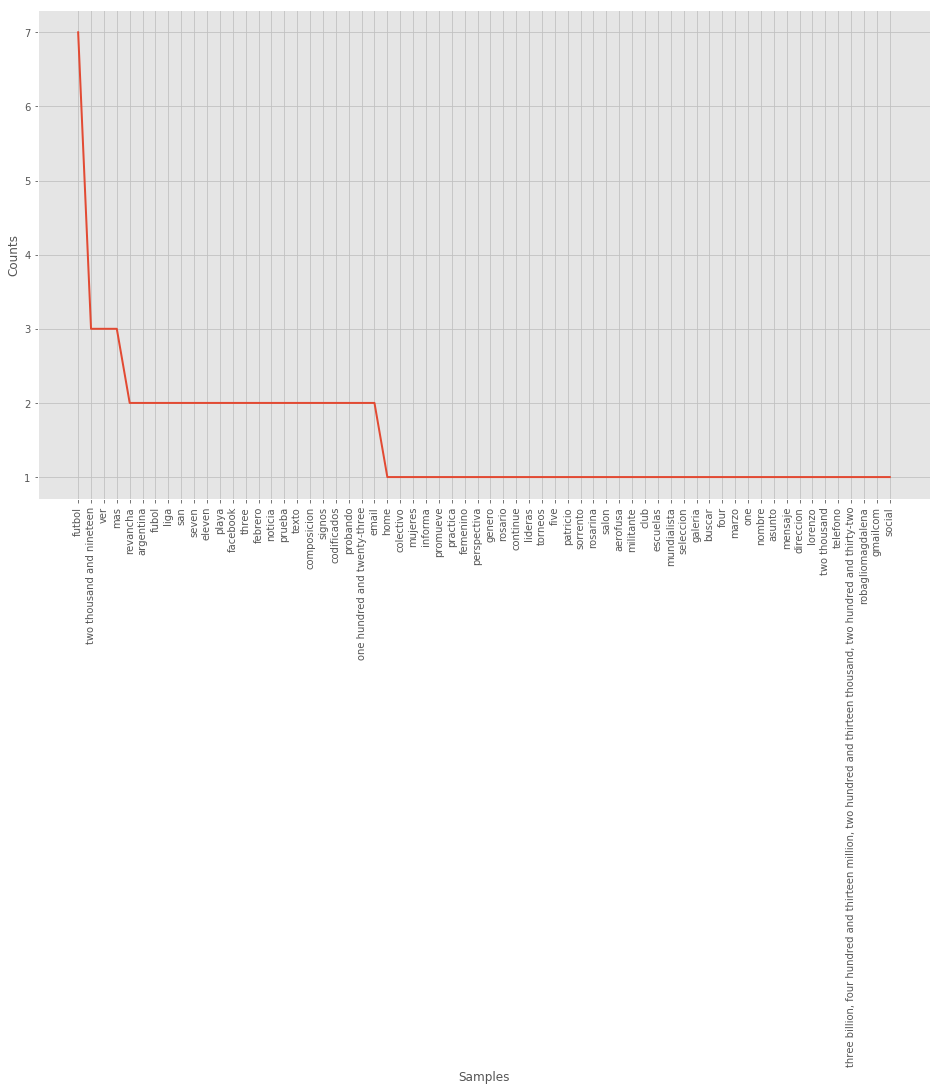

In [64]:
#Frecuencia de distribución
fdist = FreqDist(filtered_sent)

# Ploteo frecuencia de distribución
fdist.plot(cumulative=False)
plt.show()

In [66]:
print(FreqDist(filtered_sent))

<FreqDist with 64 samples and 96 outcomes>
